<a href="https://colab.research.google.com/github/luciainnocenti/IncrementalLearning/blob/newLossesRun2/ICaRLMain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import GitHub repository

In [1]:
import os
import logging
import sys

In [2]:
if not os.path.isdir('./DatasetCIFAR'):
  !git clone -b newLossesRun2 https://github.com/luciainnocenti/IncrementalLearning.git
  !mv 'IncrementalLearning' 'DatasetCIFAR'

Cloning into 'IncrementalLearning'...
remote: Enumerating objects: 102, done.
remote: Counting objects: 100% (102/102), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 1676 (delta 61), reused 0 (delta 0), pack-reused 1574
Receiving objects: 100% (1676/1676), 1.65 MiB | 3.56 MiB/s, done.
Resolving deltas: 100% (1069/1069), done.


# Import packages

In [3]:
from DatasetCIFAR.data_set import Dataset 
from DatasetCIFAR.data_set import Subset
from DatasetCIFAR import ResNet
from DatasetCIFAR import utils
from DatasetCIFAR import params
from DatasetCIFAR import ICaRLModel
from torchvision import models
import torch.nn as nn
import torch
import torch.optim as optim
import torchvision
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from torchvision import transforms
from torch.utils.data import DataLoader
from torch.nn import functional as F
import random
random.seed(params.SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
print(params.SEED)
print(params.NUM_WORKERS)

653
4


# Define Datasets

In [5]:
train_transformer = transforms.Compose([transforms.RandomCrop(size = 32, padding=4),
                                         transforms.RandomHorizontalFlip(),
                                         transforms.ToTensor(),
                                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

test_transformer = transforms.Compose([transforms.ToTensor(),
                                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [6]:
trainDS = Dataset(train=True)
testDS = Dataset(train=False)

Failed download. Trying https -> http instead. Downloading http://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz to data/cifar-100-python.tar.gz


Extracting data/cifar-100-python.tar.gz to data
Files already downloaded and verified


In [7]:
train_splits = trainDS.splits
test_splits = testDS.splits

# Define Network

In [8]:
ICaRL = ResNet.resnet32(num_classes=100)
ICaRL =  ICaRL.to(params.DEVICE)

In [9]:
exemplars = [None]*100

test_indexes =  []
accs = []

At step  0  and at epoch =  0  the loss is =  2.3499302864074707  and accuracy is =  0.245
At step  0  and at epoch =  1  the loss is =  1.7461155652999878  and accuracy is =  0.3942
At step  0  and at epoch =  2  the loss is =  2.151184558868408  and accuracy is =  0.4502
At step  0  and at epoch =  3  the loss is =  1.8523430824279785  and accuracy is =  0.4846
At step  0  and at epoch =  4  the loss is =  2.4705896377563477  and accuracy is =  0.5512
At step  0  and at epoch =  5  the loss is =  1.2230613231658936  and accuracy is =  0.552
At step  0  and at epoch =  6  the loss is =  1.0540368556976318  and accuracy is =  0.635
At step  0  and at epoch =  7  the loss is =  0.6518174409866333  and accuracy is =  0.6572
At step  0  and at epoch =  8  the loss is =  1.205470085144043  and accuracy is =  0.7
At step  0  and at epoch =  9  the loss is =  1.39253568649292  and accuracy is =  0.6992
At step  0  and at epoch =  10  the loss is =  1.3650068044662476  and accuracy is =  0.70

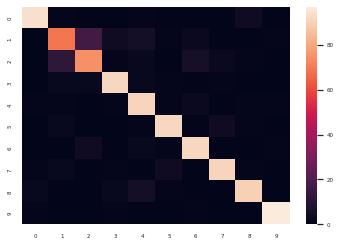

At step  10  and at epoch =  0  the loss is =  1.6816368103027344  and accuracy is =  0.27285714285714285
At step  10  and at epoch =  1  the loss is =  1.1136040687561035  and accuracy is =  0.5437142857142857
At step  10  and at epoch =  2  the loss is =  1.0051724910736084  and accuracy is =  0.6254285714285714
At step  10  and at epoch =  3  the loss is =  0.8951915502548218  and accuracy is =  0.6791428571428572
At step  10  and at epoch =  4  the loss is =  0.6826344132423401  and accuracy is =  0.7101428571428572
At step  10  and at epoch =  5  the loss is =  0.866617739200592  and accuracy is =  0.7255714285714285
At step  10  and at epoch =  6  the loss is =  0.7425127625465393  and accuracy is =  0.753
At step  10  and at epoch =  7  the loss is =  0.7316209673881531  and accuracy is =  0.7665714285714286
At step  10  and at epoch =  8  the loss is =  0.6771199107170105  and accuracy is =  0.7867142857142857
At step  10  and at epoch =  9  the loss is =  0.6095879673957825  a

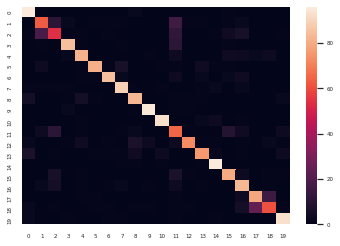

At step  20  and at epoch =  0  the loss is =  2.5916860103607178  and accuracy is =  0.19557142857142856
At step  20  and at epoch =  1  the loss is =  1.421148657798767  and accuracy is =  0.49328571428571427
At step  20  and at epoch =  2  the loss is =  1.472768783569336  and accuracy is =  0.62
At step  20  and at epoch =  3  the loss is =  1.0655083656311035  and accuracy is =  0.702
At step  20  and at epoch =  4  the loss is =  0.785625696182251  and accuracy is =  0.7391428571428571
At step  20  and at epoch =  5  the loss is =  0.8139188289642334  and accuracy is =  0.7711428571428571
At step  20  and at epoch =  6  the loss is =  0.625981867313385  and accuracy is =  0.795
At step  20  and at epoch =  7  the loss is =  0.5719075798988342  and accuracy is =  0.8044285714285714
At step  20  and at epoch =  8  the loss is =  0.7674838304519653  and accuracy is =  0.82
At step  20  and at epoch =  9  the loss is =  0.5526748299598694  and accuracy is =  0.833
At step  20  and at

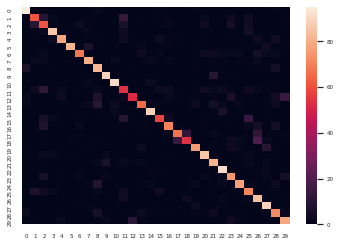

At step  30  and at epoch =  0  the loss is =  2.174091100692749  and accuracy is =  0.22482168330955776
At step  30  and at epoch =  1  the loss is =  1.2128934860229492  and accuracy is =  0.5419400855920115
At step  30  and at epoch =  2  the loss is =  1.0804215669631958  and accuracy is =  0.6774607703281027
At step  30  and at epoch =  3  the loss is =  0.8727434873580933  and accuracy is =  0.73509272467903
At step  30  and at epoch =  4  the loss is =  0.8618318438529968  and accuracy is =  0.7689015691868759
At step  30  and at epoch =  5  the loss is =  0.6664345860481262  and accuracy is =  0.803281027104137
At step  30  and at epoch =  6  the loss is =  0.5746826529502869  and accuracy is =  0.8156918687589159
At step  30  and at epoch =  7  the loss is =  0.7069408893585205  and accuracy is =  0.8289586305278174
At step  30  and at epoch =  8  the loss is =  0.6076048612594604  and accuracy is =  0.8373751783166904
At step  30  and at epoch =  9  the loss is =  0.470054715

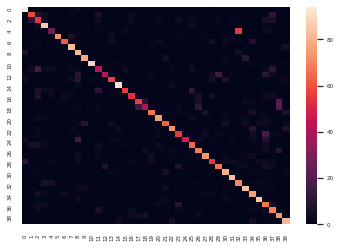

At step  40  and at epoch =  0  the loss is =  2.4736499786376953  and accuracy is =  0.19614285714285715
At step  40  and at epoch =  1  the loss is =  1.9153468608856201  and accuracy is =  0.4624285714285714
At step  40  and at epoch =  2  the loss is =  1.1465164422988892  and accuracy is =  0.607
At step  40  and at epoch =  3  the loss is =  0.9530407786369324  and accuracy is =  0.6617142857142857
At step  40  and at epoch =  4  the loss is =  1.0269274711608887  and accuracy is =  0.7017142857142857
At step  40  and at epoch =  5  the loss is =  0.8109478950500488  and accuracy is =  0.7342857142857143
At step  40  and at epoch =  6  the loss is =  0.583174467086792  and accuracy is =  0.7628571428571429
At step  40  and at epoch =  7  the loss is =  0.7287126183509827  and accuracy is =  0.7825714285714286
At step  40  and at epoch =  8  the loss is =  0.7391238212585449  and accuracy is =  0.8068571428571428
At step  40  and at epoch =  9  the loss is =  0.5249784588813782  a

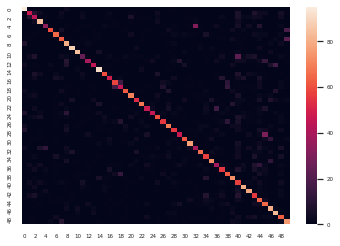

At step  50  and at epoch =  0  the loss is =  2.293130397796631  and accuracy is =  0.20114285714285715
At step  50  and at epoch =  1  the loss is =  1.6397230625152588  and accuracy is =  0.4987142857142857
At step  50  and at epoch =  2  the loss is =  1.229527473449707  and accuracy is =  0.631
At step  50  and at epoch =  3  the loss is =  0.9545609951019287  and accuracy is =  0.7042857142857143
At step  50  and at epoch =  4  the loss is =  0.798197865486145  and accuracy is =  0.7492857142857143
At step  50  and at epoch =  5  the loss is =  0.8109716176986694  and accuracy is =  0.769
At step  50  and at epoch =  6  the loss is =  0.750560462474823  and accuracy is =  0.8004285714285714
At step  50  and at epoch =  7  the loss is =  0.8361851572990417  and accuracy is =  0.8092857142857143
At step  50  and at epoch =  8  the loss is =  0.6326224207878113  and accuracy is =  0.8315714285714285
At step  50  and at epoch =  9  the loss is =  0.5453478693962097  and accuracy is =

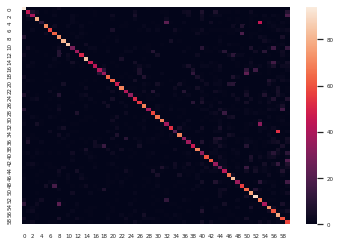

At step  60  and at epoch =  0  the loss is =  2.7186808586120605  and accuracy is =  0.17106017191977077
At step  60  and at epoch =  1  the loss is =  1.8126873970031738  and accuracy is =  0.4467048710601719
At step  60  and at epoch =  2  the loss is =  1.31125807762146  and accuracy is =  0.5849570200573065
At step  60  and at epoch =  3  the loss is =  0.9786204099655151  and accuracy is =  0.6679083094555874
At step  60  and at epoch =  4  the loss is =  0.8902570605278015  and accuracy is =  0.7130372492836676
At step  60  and at epoch =  5  the loss is =  0.8613662719726562  and accuracy is =  0.7428366762177651
At step  60  and at epoch =  6  the loss is =  0.5923061370849609  and accuracy is =  0.770916905444126
At step  60  and at epoch =  7  the loss is =  0.6196910738945007  and accuracy is =  0.7862464183381089
At step  60  and at epoch =  8  the loss is =  0.6640316843986511  and accuracy is =  0.8107449856733524
At step  60  and at epoch =  9  the loss is =  0.74936193

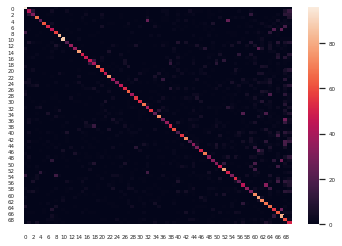

At step  70  and at epoch =  0  the loss is =  2.670872926712036  and accuracy is =  0.19359886201991466
At step  70  and at epoch =  1  the loss is =  1.4674313068389893  and accuracy is =  0.5274537695590327
At step  70  and at epoch =  2  the loss is =  1.0286540985107422  and accuracy is =  0.6594594594594595
At step  70  and at epoch =  3  the loss is =  0.763748288154602  and accuracy is =  0.7445234708392603
At step  70  and at epoch =  4  the loss is =  0.7385629415512085  and accuracy is =  0.7846372688477952
At step  70  and at epoch =  5  the loss is =  0.533035933971405  and accuracy is =  0.8241820768136557
At step  70  and at epoch =  6  the loss is =  0.5461487174034119  and accuracy is =  0.84850640113798
At step  70  and at epoch =  7  the loss is =  0.5379382967948914  and accuracy is =  0.8665718349928876
At step  70  and at epoch =  8  the loss is =  0.48306310176849365  and accuracy is =  0.8812233285917497
At step  70  and at epoch =  9  the loss is =  0.423665732

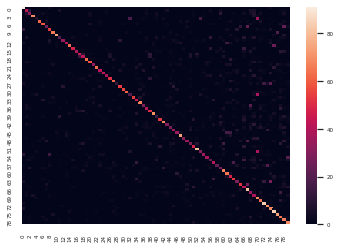

At step  80  and at epoch =  0  the loss is =  2.5835204124450684  and accuracy is =  0.22657142857142856
At step  80  and at epoch =  1  the loss is =  1.5826058387756348  and accuracy is =  0.5087142857142857
At step  80  and at epoch =  2  the loss is =  1.1939349174499512  and accuracy is =  0.6345714285714286
At step  80  and at epoch =  3  the loss is =  0.9409843683242798  and accuracy is =  0.7034285714285714
At step  80  and at epoch =  4  the loss is =  0.8323901295661926  and accuracy is =  0.743
At step  80  and at epoch =  5  the loss is =  0.7237898707389832  and accuracy is =  0.7721428571428571
At step  80  and at epoch =  6  the loss is =  0.8436861038208008  and accuracy is =  0.7928571428571428
At step  80  and at epoch =  7  the loss is =  0.7176558375358582  and accuracy is =  0.8155714285714286
At step  80  and at epoch =  8  the loss is =  0.44840022921562195  and accuracy is =  0.8258571428571428
At step  80  and at epoch =  9  the loss is =  0.40845122933387756

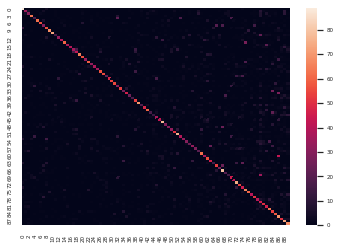

At step  90  and at epoch =  0  the loss is =  2.6705291271209717  and accuracy is =  0.20114613180515759
At step  90  and at epoch =  1  the loss is =  1.502297282218933  and accuracy is =  0.5027220630372493
At step  90  and at epoch =  2  the loss is =  1.0232901573181152  and accuracy is =  0.6492836676217765
At step  90  and at epoch =  3  the loss is =  0.8601746559143066  and accuracy is =  0.7289398280802293
At step  90  and at epoch =  4  the loss is =  0.8132238388061523  and accuracy is =  0.7732091690544413
At step  90  and at epoch =  5  the loss is =  0.5707911849021912  and accuracy is =  0.8084527220630372
At step  90  and at epoch =  6  the loss is =  0.4281214475631714  and accuracy is =  0.8330945558739254
At step  90  and at epoch =  7  the loss is =  0.5542060732841492  and accuracy is =  0.844269340974212
At step  90  and at epoch =  8  the loss is =  0.7112916111946106  and accuracy is =  0.8630372492836677
At step  90  and at epoch =  9  the loss is =  0.3430101

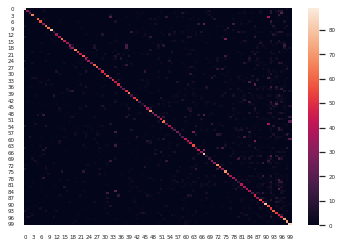

In [10]:
for task in range(0, 100, params.TASK_SIZE):
  train_indexes = trainDS.__getIndexesGroups__(task)
  test_indexes = test_indexes + testDS.__getIndexesGroups__(task)

  train_dataset = Subset(trainDS, train_indexes, transform = train_transformer)
  test_dataset = Subset(testDS, test_indexes, transform = test_transformer)

  train_loader = DataLoader( train_dataset, num_workers=params.NUM_WORKERS, batch_size=params.BATCH_SIZE, shuffle=True)
  test_loader = DataLoader( test_dataset, num_workers=params.NUM_WORKERS, batch_size=params.BATCH_SIZE , shuffle=True )
  
  ICaRL, exemplars = ICaRLModel.incrementalTrain(task, trainDS, ICaRL, exemplars, train_transformer)

  col = []
  for i,x in enumerate( train_splits[ :int(task/10) + 1]) : 
    v = np.array(x)
    col = np.concatenate( (col,v), axis = None)
    col = col.astype(int)
  mean = None
  total = 0.0
  running_corrects = 0.0
  for img, lbl, _ in train_loader:
      img = img.float().to(params.DEVICE)
      preds, mean = ICaRLModel.classify(img, exemplars, ICaRL, task, trainDS, mean)
      preds = preds.to(params.DEVICE)
      labels = utils.mapFunction(lbl, col).to(params.DEVICE)

      total += len(lbl)
      running_corrects += torch.sum(preds == labels.data).data.item()

  accuracy = float(running_corrects/total)
  print(f'task: {task}', f'train accuracy = {accuracy}')
  accs.append(accuracy)

  total = 0.0
  running_corrects = 0.0
  tot_preds = []
  tot_lab = []
  for img, lbl, _ in test_loader:
      img = img.float().to(params.DEVICE)
      preds, _ = ICaRLModel.classify(img, exemplars, ICaRL, task, trainDS, mean)
      preds = preds.to(params.DEVICE)
      labels = utils.mapFunction(lbl, col).to(params.DEVICE)

      tot_preds = np.concatenate( ( tot_preds, preds.data.cpu().numpy() ) )
      tot_lab = np.concatenate( (tot_lab, labels.data.cpu().numpy()  ) )

      total += len(lbl)
      running_corrects += torch.sum(preds == labels.data).data.item()

  accuracy = float(running_corrects/total)
  print(f'task: {task}', f'test accuracy = {accuracy}')
  cf = confusion_matrix(tot_lab, tot_preds)
  df_cm = pd.DataFrame(cf, range(task + params.TASK_SIZE), range(task + params.TASK_SIZE))
  sn.set(font_scale = .5) # for label size
  sn.heatmap(df_cm, annot=False)
  plt.show()